In [6]:
# %conda list
%pip list


Package                      Version
---------------------------- --------------
adal                         1.2.7
anyio                        4.4.0
applicationinsights          0.11.10
appnope                      0.1.4
argcomplete                  3.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
async-lru                    2.0.4
attrs                        23.2.0
azure-common                 1.1.28
azure-core                   1.30.2
azure-graphrbac              0.61.1
azure-identity               1.17.1
azure-mgmt-authorization     4.0.0
azure-mgmt-containerregistry 10.3.0
azure-mgmt-core              1.4.0
azure-mgmt-keyvault          10.3.0
azure-mgmt-network           25.4.0
azure-mgmt-resource          23.1.1
azure-mgmt-storage           21.2.1
azureml                      0.2.7
azureml-core                 1.56.0
azureml-dataprep             5.1.6
azureml-dataprep-native      

{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpj6nw3qe_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=5/part-00087-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2657-1.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpj6nw3qe_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=6/part-00171-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2741-1.c000.snappy.parquet


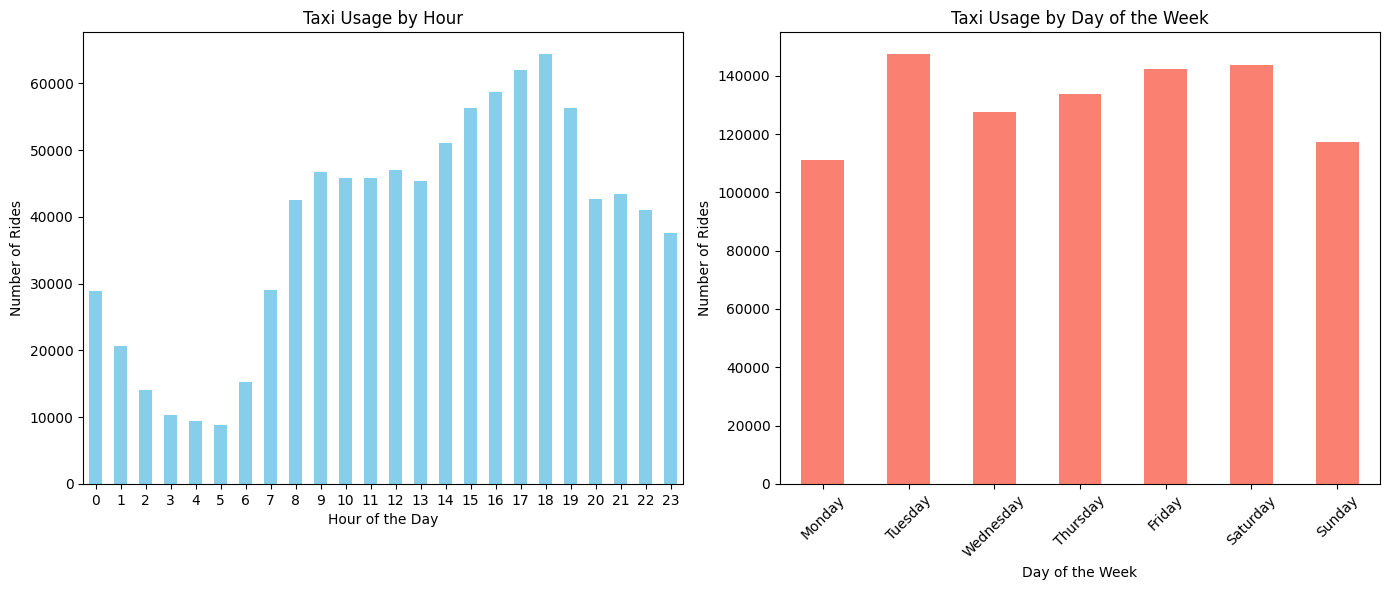

In [1]:
# Analyze temporal patterns to identify peak hours and days for taxi usage.
# date range of only 1 month
# end date 2018 - 06 - 01 
# start date 2018 - 05 - 01

# Import necessary libraries
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt

# Set the date range
end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Convert pickup datetime to pandas datetime format
nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])

# Extract hour and day of the week from the pickup datetime
nyc_tlc_df['hour'] = nyc_tlc_df['lpepPickupDatetime'].dt.hour
nyc_tlc_df['day_of_week'] = nyc_tlc_df['lpepPickupDatetime'].dt.day_name()

# Analyze the temporal patterns

# Group by hour
hourly_usage = nyc_tlc_df.groupby('hour').size()

# Group by day of the week
daily_usage = nyc_tlc_df.groupby('day_of_week').size()
daily_usage = daily_usage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the results
plt.figure(figsize=(14, 6))

# Plot hourly usage
plt.subplot(1, 2, 1)
hourly_usage.plot(kind='bar', color='skyblue')
plt.title('Taxi Usage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

# Plot daily usage
plt.subplot(1, 2, 2)
daily_usage.plot(kind='bar', color='salmon')
plt.title('Taxi Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
